## Preprocessing Data

In [2]:
import numpy as np
from random import randint
from sklearn.preprocessing import MinMaxScaler

In [3]:
train_labels =  []
train_samples = []

Example data: 
- An experiemental drug was tested on individuals from ages 13 to 100. 
- The trial had 2100 participants. Half were under 65 years old, half were over 65 years old.
- 95% of patientes 65 or older experienced side effects.
- 95% of patients under 65 experienced no side effects.

In [4]:
for i in range(50):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)
    
    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [5]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_samples, train_labels

(array([35, 69, 61, ..., 76, 15, 95]), array([1, 0, 1, ..., 1, 0, 1]))

In [6]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform((train_samples).reshape(-1,1))

In [7]:
scaled_train_samples

array([[0.25287356],
       [0.64367816],
       [0.55172414],
       ...,
       [0.72413793],
       [0.02298851],
       [0.94252874]])

## Simple Sequential Model


In [8]:
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

2024-04-03 15:24:36.181121: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-03 15:24:36.186187: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-03 15:24:36.250220: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-03 15:24:37.411457: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [9]:
model = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

model.summary()

/home/genos/code/college/ml/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 642 (2.51 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
model.compile(Adam(learning_rate=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(scaled_train_samples, train_labels, validation_split=0.1,
          batch_size=10, epochs=20, shuffle=True, verbose=2)

Epoch 1/20
189/189 - 1s - 6ms/step - accuracy: 0.5667 - loss: 0.6750 - val_accuracy: 0.6143 - val_loss: 0.6621
Epoch 2/20
189/189 - 0s - 2ms/step - accuracy: 0.6413 - loss: 0.6554 - val_accuracy: 0.7190 - val_loss: 0.6370
Epoch 3/20
189/189 - 0s - 2ms/step - accuracy: 0.7376 - loss: 0.6300 - val_accuracy: 0.7810 - val_loss: 0.6063
Epoch 4/20
189/189 - 0s - 2ms/step - accuracy: 0.7704 - loss: 0.6035 - val_accuracy: 0.7952 - val_loss: 0.5748
Epoch 5/20
189/189 - 0s - 2ms/step - accuracy: 0.7852 - loss: 0.5749 - val_accuracy: 0.8524 - val_loss: 0.5405
Epoch 6/20
189/189 - 0s - 2ms/step - accuracy: 0.8138 - loss: 0.5442 - val_accuracy: 0.8714 - val_loss: 0.5034
Epoch 7/20
189/189 - 0s - 2ms/step - accuracy: 0.8413 - loss: 0.5125 - val_accuracy: 0.8762 - val_loss: 0.4656
Epoch 8/20
189/189 - 0s - 2ms/step - accuracy: 0.8508 - loss: 0.4813 - val_accuracy: 0.9048 - val_loss: 0.4287
Epoch 9/20
189/189 - 0s - 2ms/step - accuracy: 0.8677 - loss: 0.4516 - val_accuracy: 0.9095 - val_loss: 0.3940
E

# Save and Load Model

## 1. model.save()

In [11]:
model.save('medical_trial_model.keras')

This save functions saves:
- The architecture of the model, allowing to re-create the model.
- The weights of the model.
- The training configuration (loss, optimizer).
- The state of the optimizer, allowing to resume training exactly where you left off.


In [12]:
from keras.models import load_model
new_model = load_model('medical_trial_model.keras')
new_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,928 (7.54 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,286 (5.03 KB)

In [13]:
new_model.get_weights()

[array([[-0.00745533,  0.1206022 ,  0.22083865, -0.29399857,  0.57196546,
         -0.5273161 ,  0.29241118, -0.5537504 , -0.35380706,  0.38256806,
         -0.4870169 ,  0.46723276, -0.09295036, -0.0850907 , -0.12010357,
          0.3090543 ]], dtype=float32),
 array([ 0.16888946,  0.20681703, -0.058459  ,  0.        , -0.09290871,
         0.        , -0.07128625,  0.        ,  0.        , -0.09616246,
         0.        , -0.07584461,  0.18939944,  0.        ,  0.        ,
        -0.06480773], dtype=float32),
 array([[ 2.32091565e-02, -2.10137770e-01, -3.06908458e-01,
          1.81774572e-01,  1.34640589e-01,  3.07460874e-01,
         -1.40255108e-01, -3.15219045e-01, -9.34893936e-02,
          5.78302294e-02, -3.07557464e-01,  3.85212064e-01,
         -1.10092275e-01,  1.19447052e-01,  2.23231718e-01,
         -2.79910654e-01,  1.73483238e-01, -1.89782709e-01,
          4.28659171e-02, -2.91573733e-01, -1.28156766e-01,
         -1.92094818e-01,  2.63898879e-01,  2.24333063e-01,
 

In [14]:
new_model.optimizer

## 2. model.to_json()

If you only need to save the architecture of a model, and not its weights or its training configuration, you can use the following function to save the architecture only.

In [15]:
json_string = model.to_json() # save as JSON
# yaml_string = model.to_yaml() # save as YAML

In [16]:
json_string

'{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential", "trainable": true, "dtype": "float32", "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 1], "dtype": "float32", "sparse": false, "name": "input_layer"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense", "trainable": true, "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"module": "keras.initializers", "class_name": "Zeros", "config": {}, "registered_name": null}, "kernel_regularizer": null, "bias_regularizer": null, "kernel_constraint": null, "bias_constraint": null}, "registered_name": null, "build_config": {"input_shape": [null, 1]}}, {"module": "keras.layers", "class_name": "Dense", "config": {"name": "dense_1", "trainab

In [17]:
# model reconstruction from JSON:
from keras.models import model_from_json
model_architecture = model_from_json(json_string)

# model reconstruction from YAML
# from keras.models import model_from_yaml
# model = model_from_yaml(yaml_string)
model_architecture.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │            32 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,928 (7.54 KB)

 Trainable params: 642 (2.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,286 (5.03 KB)

## 3. model.save_weights()

If you only need to save the weights of a model, you can use the following function save the weights only.

In [18]:
model.save_weights('my_model.weights.h5')

In [19]:
model2 = Sequential([
    Dense(16, input_shape=(1,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

In [20]:
model2.load_weights('my_model.weights.h5')

## Preprocess Test Data

In [21]:
test_labels =  []
test_samples = []

In [22]:
for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)
    
    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)
    
    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

In [23]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)

In [24]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_test_samples = scaler.fit_transform((test_samples).reshape(-1,1))

## Predict

In [25]:
predictions = model.predict(scaled_test_samples, batch_size=10, verbose=0) 

In [26]:
predictions

array([[0.9317879 , 0.06821204],
       [0.2414492 , 0.75855076],
       [0.8842554 , 0.11574464],
       [0.1257272 , 0.87427276],
       [0.90231985, 0.09768017],
       [0.20695437, 0.7930455 ],
       [0.87369627, 0.12630367],
       [0.19112788, 0.8088721 ],
       [0.837003  , 0.162997  ],
       [0.0707525 , 0.9292475 ],
       [0.6987954 , 0.30120462],
       [0.09645706, 0.90354294],
       [0.9415176 , 0.05848238],
       [0.05021027, 0.9497897 ],
       [0.8936874 , 0.10631257],
       [0.22372901, 0.77627105],
       [0.94137204, 0.05862795],
       [0.10546644, 0.8945336 ],
       [0.94151765, 0.05848238],
       [0.10546643, 0.8945335 ],
       [0.94139624, 0.05860367],
       [0.04326528, 0.9567347 ],
       [0.94132346, 0.05867655],
       [0.0707525 , 0.92924744],
       [0.8936874 , 0.10631257],
       [0.04116121, 0.95883876],
       [0.6774882 , 0.32251182],
       [0.03915525, 0.9608447 ],
       [0.9103217 , 0.08967834],
       [0.07504562, 0.92495435],
       [0.

In [27]:
rounded_predictions = model.predict(scaled_test_samples, batch_size=10, verbose=0) 

In [28]:
rounded_predictions

array([[0.9317879 , 0.06821204],
       [0.2414492 , 0.75855076],
       [0.8842554 , 0.11574464],
       [0.1257272 , 0.87427276],
       [0.90231985, 0.09768017],
       [0.20695437, 0.7930455 ],
       [0.87369627, 0.12630367],
       [0.19112788, 0.8088721 ],
       [0.837003  , 0.162997  ],
       [0.0707525 , 0.9292475 ],
       [0.6987954 , 0.30120462],
       [0.09645706, 0.90354294],
       [0.9415176 , 0.05848238],
       [0.05021027, 0.9497897 ],
       [0.8936874 , 0.10631257],
       [0.22372901, 0.77627105],
       [0.94137204, 0.05862795],
       [0.10546644, 0.8945336 ],
       [0.94151765, 0.05848238],
       [0.10546643, 0.8945335 ],
       [0.94139624, 0.05860367],
       [0.04326528, 0.9567347 ],
       [0.94132346, 0.05867655],
       [0.0707525 , 0.92924744],
       [0.8936874 , 0.10631257],
       [0.04116121, 0.95883876],
       [0.6774882 , 0.32251182],
       [0.03915525, 0.9608447 ],
       [0.9103217 , 0.08967834],
       [0.07504562, 0.92495435],
       [0.

## Confusion Matrix

In [29]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [30]:
cm = confusion_matrix(test_labels, np.argmax(rounded_predictions, axis=-1))
test_labels.shape, rounded_predictions.shape

((420,), (420, 2))

In [31]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[186  24]
 [ 10 200]]


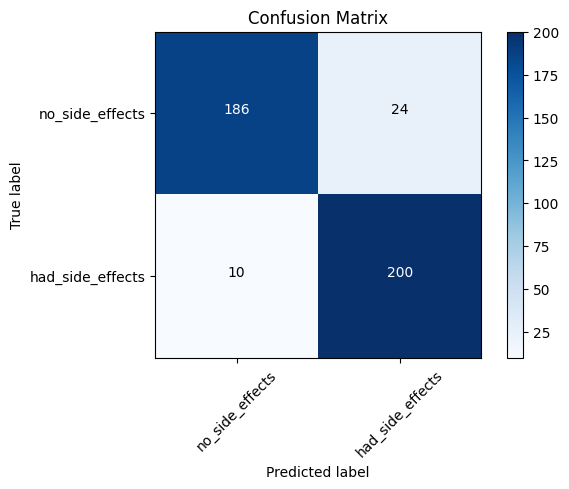

In [32]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm, cm_plot_labels, title='Confusion Matrix')